## Process of Training

1. Hypothesis set = directed acyclic graph 만들기
Ex) neural network
2. Loss function = probability로 구하는 게 젤 효율적 ex) softmax, gaussian 
3. Optimization algorithm(to reduce loss) = 미분을 통해 gradient만 잘 계산하면 장땡 using backpropagation(자동으로 gradient 계산해줌)
-> 모든 데이터에 대한 gradient 구하는건 너무 비효율적&time consuming하니 
stokcast gradient descent = 트레이닝 데이터 여러개중 몇개만 골라서 gradient 구해주기

## Loss Function
We use a loss function to determine how far the predicted values deviate from the actual values in the training data.

손실 함수는 학습을 통해 얻은 데이터의 추정치가 실제 데이터와 얼마나 차이나는지 평가하는 지표로 쓰인다. 이 값이 크면 클수록 많이 틀렸다는 의미고, 이 값이 0일수록 무손실

https://www.tensorflow.org/api_docs/python/tf/losses

https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0

### - MSE
MSE is the sum of squared distances between our target variable and predicted values.

In [2]:
mse = tf.losses.mean_squared_error(y, y_predicted)

NameError: name 'tf' is not defined

### - Huber Loss
Huber loss is less sensitive to outliers in data than the squared error loss

https://www.tensorflow.org/api_docs/python/tf/losses/huber_loss

## Gradient Descent
Gradient Descent is an optimization algorithm used for minimizing the cost function in various machine learning algorithms. It is basically used for updating the parameters of the learning model.

https://www.geeksforgeeks.org/gradient-descent-algorithm-and-its-variants/

Loss at step 000: 65.726
Loss at step 100: 44.310
Loss at step 200: 29.986
Loss at step 300: 20.406
Loss at step 400: 13.998
Loss at step 500: 9.712
Loss at step 600: 6.845
Loss at step 700: 4.927
Loss at step 800: 3.645
Loss at step 900: 2.787
Loss at step 1000: 2.213
W : [3.3561802] , b  = [2.9686484] 


<function matplotlib.pyplot.show(*args, **kw)>

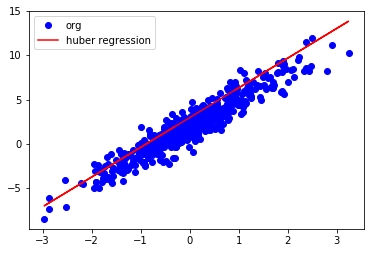

In [5]:
"""
author:-aam35
"""
import time

import tensorflow as tf
import tensorflow.contrib.eager as tfe
import matplotlib.pyplot as plt

tfe.enable_eager_execution()

# random seed to get the consistent result
tf.random.set_random_seed(6)

# Create data
NUM_EXAMPLES = 500

#define inputs and outputs with some noise 
X = tf.random_normal([NUM_EXAMPLES])  #inputs 
noise = tf.random_normal([NUM_EXAMPLES]) #noise 
y = X * 3 + 2 + noise  #true output

# Create variables.
W = tf.Variable(tf.random_uniform([1],0,10,dtype=tf.float32))
b = tf.Variable(tf.random_uniform([1],0,10,dtype=tf.float32))


train_steps = 1000
learning_rate = 0.001

# Define the linear predictor.
def prediction(x):
    y_predicted = tf.add(tf.multiply(X,W),b)
    return y_predicted

# Define loss functions of the form: L(y, y_predicted)
def squared_loss(y, y_predicted):
    loss = tf.reduce_mean(tf.square(y-y_predicted))
    return loss

def huber_loss(y, y_predicted, m=1.0):
    error = y-y_predicted
    loss = tf.Variable(0.0)
    for i in error:
        if tf.abs(i)<=m:
            loss = tf.add(loss,0.5*tf.square(i))
        else:
            loss = tf.add(loss,0.5*tf.square(i)+m*(tf.abs(i)-m))
    return loss//NUM_EXAMPLES


for i in range(train_steps+1):
  #watch the gradient flow 
    with tf.GradientTape() as tape:
    
        #get prediction
        y_predicted = prediction(X)
    
        #calcuate the loss (difference squared error)
        loss = squared_loss(y,y_predicted)
        # caculate the loss (huber loss)
        #loss = huber_loss(y,y_predicted)
        # calculate hybrid loss
        #loss = squared_loss(y,y_predicted) + huber_loss(y,y_predicted)
  
    #evaluate the gradient with the respect to the paramters
    dW, db = tape.gradient(loss, [W, b])

    #update the paramters using Gradient Descent  
    W.assign_sub(dW * learning_rate)
    b.assign_sub(db* learning_rate)

    #print the loss every 20 iterations 
    if i % 100 == 0:
        print("Loss at step {:03d}: {:.3f}".format(i, loss))
      
    
# print the result
print(f'W : {W.numpy()} , b  = {b.numpy()} ')
plt.plot(X, y, 'bo',label='org')
plt.plot(X, X * W.numpy() + b.numpy(), 'r',
         label="huber regression")
plt.legend()
plt.show